# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

| title | description |
| ------ | ------ |
| **id:**       |              id of the movie |
| **imdb_id:**           |     id of the movie given by imdb  |
| **budget:**           |      budgted money for the project |
| **revenue:**           |     generated revenue of the project |
| **original_title:**     |    title of the movie |
| **cast:**                |   actors that play in the movie |
| **homepage:**             |  official promotional movie website |
| **director:**            |   director in charge of the project |
| **tagline:**       |         catchphrase of the movie  |
| **keywords:**       |        words used by search engine for movie |
| **overview:**        |       brief description of movie |
| **runtime:**          |      how long the movie goes on for in minutes |
| **genres:**            |     the types and different kinds of movies |
| **production_companies:**|   companies responsible for producing the movie |
| **release_date:**         |  date movie was released|
| **vote_count:**            | total amount of votes on imdb |
| **vote_average:**       |    average score of votes on imdb |
| **release_year:**     |      year the movie was released  |
| **budget_adj:**       |      budget of associated movie in terms of 2010 USD (account for inflation over time) |
| **revenue_adj:**       |     revenue of associated movie in terms of 2010 USD (account for inflation over time) |

### Question(s) for Analysis
> Which genres are most popular from year to year?

> Which director produced the most amount of movies?

> What year were the most movies released?

> Which movie had the highest budget and highest payout?

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading in the csv 
df = pd.read_csv("C:/Users/Admin/PycharmProjects/scientificProject/data/tmdb-movies.csv")

In [3]:
# initial inspection of the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning

In [4]:
# determining missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**cast, homepage, director, tagline, keywords, overview, genres,** and **production_companies** are all missing values

to conduct our analysis we will drop **imdb_id**, **homepage**, **tagline**, **keywords**, **cast**, and **overview** as they are not relevant to
the answers we are looking for.

In [5]:
# drop missing values 
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'cast'], axis=1, inplace=True)

In [6]:
# checking statistical information
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Movies can not have a budget, revenue or a runtime of 0 so we must clean the dataframe a bit more

We start by removing all the duplicates

In [7]:
sum(df.duplicated())

1

In [8]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

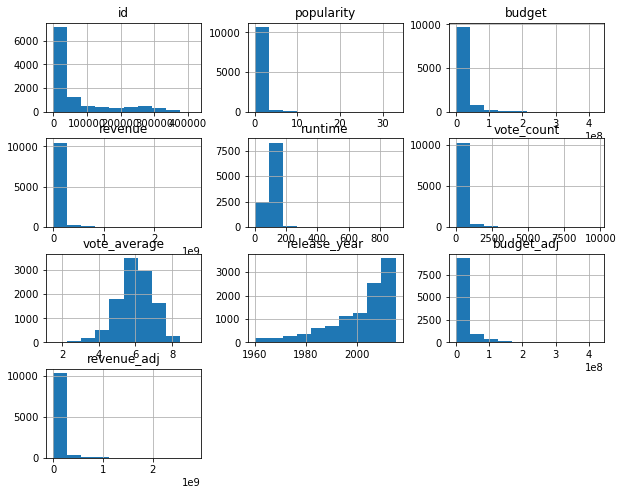

In [9]:
df.hist(figsize=(10,8));

In [10]:
# check if budget and revenue are equal to 0
budget_revenue_0 = df.query('budget == 0 and revenue == 0')
budget_revenue_0

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,347096,2.165433,0,0,Mythica: The Darkspore,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.0
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.0
92,370687,1.876037,0,0,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
100,326359,1.724712,0,0,Frozen Fever,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.0
101,254302,1.661789,0,0,High-Rise,Ben Wheatley,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,0.087034,0,0,Carry On Screaming!,Gerald Thomas,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.0
10861,21,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.0
10862,20379,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.0
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.0


we're interested in movies with highest **budgets** and **revenues**, our dataframe here returns 4701 which is too much missing data
so we will drop any row in which budget = 0 and revenue = 0

In [11]:
# get the index of the previous query
budget_revenue_0 = df.query('budget == 0 and revenue == 0').index

In [12]:
# drop index of dataframe budget_revenue_0
df.drop(budget_revenue_0, inplace=True)
df

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,5923,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08
10841,42701,0.264925,75000,0,The Shooting,Monte Hellman,82,Western,Proteus Films,10/23/66,12,5.5,1966,5.038511e+05,0.000000e+00
10848,2161,0.207257,5115000,12000000,Fantastic Voyage,Richard Fleischer,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07
10855,13343,0.141026,700000,0,The Ghost & Mr. Chicken,Alan Rafkin,90,Comedy|Family|Mystery|Romance,Universal Pictures,1/20/66,14,6.1,1966,4.702610e+06,0.000000e+00


now that we've cleared any row with the condition that **budget** and **revenue** are 0 we must check for individual column values
where **budget == 0** or **revenue == 0** and fill it with **mean** values that way we have a more precise analysis

In [13]:
# tidy up our df by resetting the current index
df.reset_index(inplace=True)

In [14]:
# drop the previous index
df.drop('index', axis=1, inplace=True)

In [15]:
# checking for NaN values
df.isnull().sum()

id                        0
popularity                0
budget                    0
revenue                   0
original_title            0
director                  4
runtime                   0
genres                    1
production_companies    186
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
# grab the means of budget and revenue
# replace each 0 value in the columns of budget and revenue with their respective averages
budget_mean = df['budget'].mean()
revenue_mean = df['revenue'].mean()
df['budget'] = df['budget'].replace(0, budget_mean)
df['revenue'] = df['revenue'].replace(0, revenue_mean)

In [18]:
# checking statistical information to see if it matches up with our previous wrangling
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5974.000000,5974.000000,5.974000e+03,5.974000e+03,5974.000000,5974.000000,5974.000000,5974.000000,5.974000e+03,5.974000e+03
mean,47777.140777,0.930656,3.065569e+07,8.715113e+07,106.806327,366.500335,6.048577,2000.830097,3.176313e+07,9.332488e+07
std,75356.276178,1.254288,3.600648e+07,1.458043e+08,22.956801,742.346266,0.858908,11.996697,4.109336e+07,1.847600e+08
min,5.000000,0.001783,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9082.000000,0.335086,8.000000e+06,1.327087e+07,93.000000,33.250000,5.500000,1994.000000,2.808100e+06,2.608183e+05
50%,13474.500000,0.587159,2.500000e+07,5.793733e+07,103.000000,103.500000,6.100000,2004.000000,1.709427e+07,2.541079e+07
75%,46835.000000,1.068673,3.500000e+07,7.493956e+07,116.000000,337.750000,6.600000,2010.000000,4.326677e+07,9.920532e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


we'll do the same with **budget_adj** and **revenue_adj** so we can plot them later

In [19]:
budget_adj_mean = df['budget_adj'].mean()
revenue_adj_mean = df['revenue_adj'].mean()
df['budget_adj'] = df['budget_adj'].replace(0, budget_adj_mean)
df['revenue_adj'] = df['revenue_adj'].replace(0, revenue_adj_mean)

lets check which rows for runtime are 0, since movies cannot have a runtime of 0 minutes

In [20]:
df.query('runtime == 0')

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
559,286372,0.037459,3250000.0,7.235142e+07,Treehouse,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,9.332488e+07


Since there is only one row in which runtime = 0 we can easily impute the value from a source
https://www.imdb.com/title/tt1791681/technical?ref_=tt_spec_sm

Treehouse runs for 100 minutes.

In [21]:
df['runtime'] = df['runtime'].replace(0, 100)

In [22]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5974.000000,5974.000000,5.974000e+03,5.974000e+03,5974.000000,5974.000000,5974.000000,5974.000000,5.974000e+03,5.974000e+03
mean,47777.140777,0.930656,3.065569e+07,8.715113e+07,106.823067,366.500335,6.048577,2000.830097,3.678759e+07,1.124148e+08
std,75356.276178,1.254288,3.600648e+07,1.458043e+08,22.915330,742.346266,0.858908,11.996697,3.877880e+07,1.788572e+08
min,5.000000,0.001783,1.000000e+00,2.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,9082.000000,0.335086,8.000000e+06,1.327087e+07,93.000000,33.250000,5.500000,1994.000000,1.105309e+07,1.845174e+07
50%,13474.500000,0.587159,2.500000e+07,5.793733e+07,103.000000,103.500000,6.100000,2004.000000,3.144927e+07,7.935649e+07
75%,46835.000000,1.068673,3.500000e+07,7.493956e+07,116.000000,337.750000,6.600000,2010.000000,4.326677e+07,9.920532e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


we now have a clean dataframe we can explore 

<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year?

In [23]:
# define a function exploder that takes an input of a column string and returns a dataframe where the column
# is split then assigns the column to itself, then explodes the column into extra rows, and finally resets the index
def exploder(column):
  mydict = {
    column: df[column].str.split('|')
  }
  return df.assign(**mydict).explode(column).reset_index(drop=True)

In [24]:
# calling on function exploder
df2 = exploder('genres')
df2

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
3,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15521,13343,0.141026,700000.0,7.235142e+07,The Ghost & Mr. Chicken,Alan Rafkin,90,Comedy,Universal Pictures,1/20/66,14,6.1,1966,4.702610e+06,9.332488e+07
15522,13343,0.141026,700000.0,7.235142e+07,The Ghost & Mr. Chicken,Alan Rafkin,90,Family,Universal Pictures,1/20/66,14,6.1,1966,4.702610e+06,9.332488e+07
15523,13343,0.141026,700000.0,7.235142e+07,The Ghost & Mr. Chicken,Alan Rafkin,90,Mystery,Universal Pictures,1/20/66,14,6.1,1966,4.702610e+06,9.332488e+07
15524,13343,0.141026,700000.0,7.235142e+07,The Ghost & Mr. Chicken,Alan Rafkin,90,Romance,Universal Pictures,1/20/66,14,6.1,1966,4.702610e+06,9.332488e+07


In [25]:
# we only need to analyze these tree columns for this question
# so we'll use a groupby to condense our data
genre_pop = df2.groupby(['genres', 'release_year'], as_index=False)['popularity'].mean()
genre_pop

,genres,release_year,popularity
0,Action,1960,1.504538
1,Action,1961,0.397790
2,Action,1962,1.309838
3,Action,1963,1.165505
4,Action,1964,3.153791
...,...,...,...
932,Western,2011,1.175800
933,Western,2012,3.100233
934,Western,2013,0.665255
935,Western,2014,0.870104


In [26]:
# pivot our table so that our values are in each cell
# this makes plotting a stackplot later on 
genre_pop_pivot = genre_pop.pivot(index = 'release_year', columns = 'genres', values = 'popularity')
genre_pop_pivot.fillna(genre_pop_pivot.mean(), inplace=True)
genre_pop_pivot.head(10)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,1.504538,1.292261,1.296847,0.346555,0.815008,0.254226,1.271213,0.114188,0.712389,0.206227,1.136943,1.020254,0.633756,0.747776,0.526439,0.419804,0.381509,1.215310,0.875246,1.872132
1961,0.397790,1.693268,2.631987,1.244521,0.900245,0.254226,0.566873,1.467885,1.139455,0.206227,0.538364,0.249542,0.900245,0.747776,0.681549,1.103449,0.381509,0.879094,0.754548,0.173731
1962,1.309838,1.621842,1.296847,0.279738,0.810805,0.254226,0.491018,0.323933,0.235542,0.235542,0.700761,0.156009,0.323933,0.294409,0.529660,0.215748,0.381509,1.358649,0.700761,0.516593
1963,1.165505,0.876569,1.296847,0.664140,0.743007,0.254226,0.558673,0.178713,0.178713,0.206227,0.481618,0.506442,0.633756,0.482756,0.658359,0.334587,0.381509,1.106810,0.664326,0.706286
1964,3.153791,1.674366,1.296847,1.148764,0.644726,0.254226,0.677282,1.310850,1.987819,0.206227,0.677922,0.008990,1.144632,0.663446,0.308043,0.178025,0.381509,1.908618,2.210475,0.706286
1965,0.568524,0.884180,1.296847,0.623090,0.289649,0.254226,0.627460,1.313676,1.139455,0.206227,0.194964,0.151644,0.968850,0.747776,1.297865,1.103449,0.381509,0.632767,0.467732,0.119918
1966,0.351247,0.318924,1.227582,0.592991,0.410366,0.254226,0.501159,0.592991,1.139455,0.206227,0.677922,0.035919,0.633756,0.271878,0.220469,0.308812,0.381509,0.380445,0.299911,0.330296
1967,1.338467,1.361477,1.348805,0.788116,0.598588,0.254226,0.663331,1.395994,0.241283,0.206227,0.677922,0.109398,0.227287,0.428652,0.719199,0.109398,0.381509,0.856507,0.485288,0.139647
1968,0.587188,1.338845,1.296847,0.428627,0.472108,0.254226,0.412636,0.478477,0.323826,0.206227,0.569422,0.891400,0.633129,1.728887,0.289199,1.502458,0.381509,0.472108,0.474040,0.621202


Lets take the top 5 genres and compare them for our analysis

In [27]:
# find the top 5 genres
genre_pop_pivot.max()

genres
Action             3.881984
Adventure          4.655137
Animation          2.631987
Comedy             1.633463
Crime              2.543844
Documentary        0.532044
Drama              1.584969
Family             2.649063
Fantasy            3.346957
Foreign            0.576448
History            2.118270
Horror             1.348323
Music              1.240614
Mystery            2.020105
Romance            1.678461
Science Fiction    4.869510
TV Movie           0.824366
Thriller           2.728520
War                2.914210
Western            3.178796
dtype: float64

In [28]:
genre_pop_pivot.reset_index(inplace=True)

In [29]:
genre_pop_pivot.describe()

genres,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1987.500000,1.068986,1.270803,1.296847,0.726556,0.815008,0.254226,0.712206,1.028380,1.139455,...,0.677922,0.572184,0.633756,0.747776,0.663417,1.103449,0.381509,0.879094,0.875246,0.706286
std,16.309506,0.647501,0.726748,0.537423,0.259480,0.384837,0.097790,0.236450,0.502248,0.657881,...,0.330330,0.282267,0.264206,0.387603,0.272835,0.826921,0.079431,0.388605,0.505315,0.578731
min,1960.000000,0.277698,0.318924,0.198304,0.279738,0.282897,0.029670,0.383619,0.017498,0.178713,...,0.067973,0.008990,0.079679,0.144334,0.146421,0.109398,0.087904,0.336237,0.029670,0.119918
25%,1973.750000,0.714057,0.893552,1.016065,0.585229,0.603240,0.254226,0.564823,0.676479,0.717528,...,0.521220,0.402529,0.460645,0.490943,0.501938,0.663631,0.381509,0.650239,0.578983,0.380984
50%,1987.500000,0.957083,1.135986,1.296847,0.697745,0.776774,0.254226,0.683358,1.041444,1.072774,...,0.677922,0.578599,0.633756,0.713630,0.626784,1.000081,0.381509,0.812381,0.831580,0.689137
75%,2001.250000,1.201547,1.474302,1.521140,0.790981,0.948598,0.261584,0.781416,1.329716,1.522485,...,0.815000,0.733675,0.775909,0.898010,0.839494,1.325690,0.381509,1.005407,0.964726,0.715715
max,2015.000000,3.881984,4.655137,2.631987,1.633463,2.543844,0.532044,1.584969,2.649063,3.346957,...,2.118270,1.348323,1.240614,2.020105,1.678461,4.869510,0.824366,2.728520,2.914210,3.178796


Action, Adventure, Science Fiction, Fantasy, and Western

In [30]:
# declaring several dataframes to pull from
# in each dataframe we pull the column release_year and the respective genre
# then we declare coordinate variables to plot the values of those columns
df_Action = genre_pop_pivot[['release_year','Action']] 
df_Adventure = genre_pop_pivot[['release_year','Adventure']]
df_Scifi = genre_pop_pivot[['release_year','Science Fiction']]
df_Fantasy = genre_pop_pivot[['release_year','Fantasy']]
df_Western = genre_pop_pivot[['release_year','Western']]

x1 = df_Action['release_year'].values
x2 = df_Action['Action'].values
y1 = df_Adventure['release_year'].values
y2 = df_Adventure['Adventure'].values
z1 = df_Scifi['release_year'].values
z2 = df_Scifi['Science Fiction'].values
g1 = df_Fantasy['release_year'].values
g2 = df_Fantasy['Fantasy'].values
h1 = df_Western['release_year'].values
h2 = df_Western['Western'].values

In [31]:
h2

array([1.872132  , 0.173731  , 0.516593  , 0.70628585, 0.70628585,
       0.119918  , 0.3302965 , 0.139647  , 0.621202  , 0.761498  ,
       0.3024795 , 0.70628585, 0.3712775 , 0.384763  , 0.38422   ,
       0.162767  , 0.597297  , 0.70628585, 0.70628585, 0.151386  ,
       0.273592  , 0.70628585, 0.138162  , 0.290596  , 0.70628585,
       0.401915  , 0.731945  , 0.70628585, 0.70628585, 0.70628585,
       1.695911  , 0.533228  , 0.575778  , 0.615028  , 0.73891   ,
       0.820175  , 0.70628585, 0.70628585, 1.057585  , 0.276305  ,
       0.4273735 , 0.328665  , 1.040588  , 0.710305  , 0.67198867,
       0.8976535 , 0.463068  , 0.5499145 , 0.3659135 , 0.70628585,
       0.8862955 , 1.17580033, 3.100233  , 0.66525533, 0.870104  ,
       3.17879617])

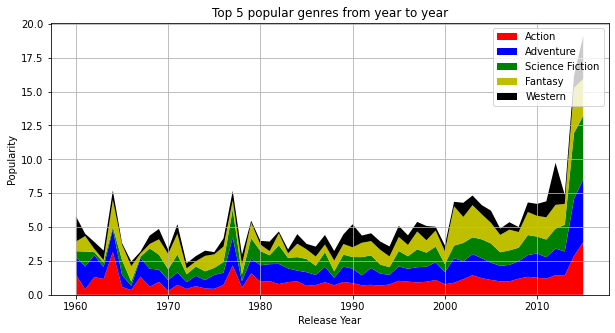

In [32]:
#plot the 3D stackplot of our dataframes
fig, ax = plt.subplots(figsize=(10,5))
plt.stackplot(x1, x2, y2, z2, g2, h2,
labels = ["Action", "Adventure", "Science Fiction", "Fantasy", "Western"], colors = ['r','b','g','y','k'])
ax.grid(True)
ax.legend()
plt.xlabel("Release Year")
plt.ylabel("Popularity")
plt.title("Top 5 popular genres from year to year")
plt.show()

The stackplot seems to be in line with our statistical information from the describe method we called earlier.

Western seems to be the most popular movie genre over time.

Lets analyze this dataframe with a scatter plot to compare our results

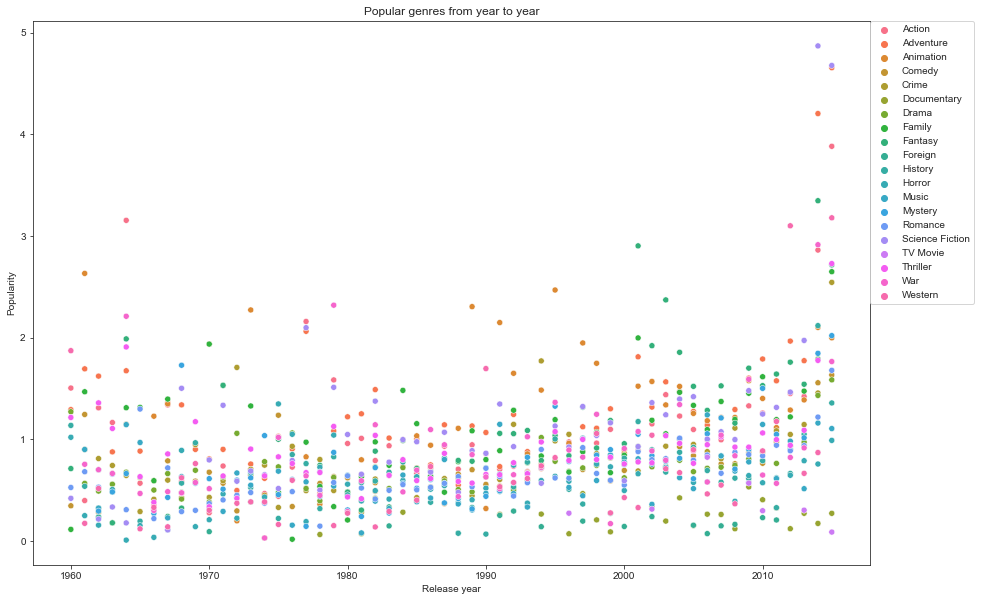

In [33]:
# plotting a scatterplot instead to compare results
plt.figure(figsize=(15,10))
sns.set_style('ticks')

plt.title('Popular genres from year to year')
plt.xlabel('Release year')
plt.ylabel('Popularity')

sns.scatterplot(x="release_year", y="popularity", hue="genres", data=genre_pop);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.);

We had to use the dataframe before we pivoted the data in order to analyze the scatter plot better.

Our highest bubble is > 2010 which is Science Fiction, it correctly matches up with our descriptive statistics.

There isn't any correlation we can make with genres over time on this scatter plot.

The stackplot is the superior choice of analysis for this question.

### Which director produced the most amount of movies?

In [34]:
# calling on function exploder
df3 = exploder('director')
df3

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,5923,0.299911,12000000.0,2.000000e+07,The Sand Pebbles,Robert Wise,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08
6492,42701,0.264925,75000.0,7.235142e+07,The Shooting,Monte Hellman,82,Western,Proteus Films,10/23/66,12,5.5,1966,5.038511e+05,9.332488e+07
6493,2161,0.207257,5115000.0,1.200000e+07,Fantastic Voyage,Richard Fleischer,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07
6494,13343,0.141026,700000.0,7.235142e+07,The Ghost & Mr. Chicken,Alan Rafkin,90,Comedy|Family|Mystery|Romance,Universal Pictures,1/20/66,14,6.1,1966,4.702610e+06,9.332488e+07


In [35]:
df3['director'].value_counts().head()

Steven Spielberg    30
Woody Allen         30
Clint Eastwood      26
Ridley Scott        23
Martin Scorsese     22
Name: director, dtype: int64

Looks like its a tie between Woody Allen and Steven Spielberg!

### What year were the most movies released?

In [36]:
df['release_year'].value_counts().head()

2013    318
2011    303
2014    294
2012    280
2010    268
Name: release_year, dtype: int64

2013 was the year most movies were released

### What is the correlation between budget and revenue?

To answer this question lets take a look at our exploded dataframe from question 1 and its statistics again.

In [37]:
df2.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
3,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Now we can look at the correlations of budget, revenue, popularity, and net_profit

In [38]:
# set the dataframe equal to the columns we need to further analyze the correlation we're looking for
df4 = df2[['popularity', 'budget', 'revenue', 'genres']]
df5 = df4.copy()

In [39]:
# get the net profit from our current columns
df5['net_profit'] = df['revenue'] - df['budget']
df5

,popularity,budget,revenue,genres,net_profit
0,32.985763,150000000.0,1.513529e+09,Action,1.363529e+09
1,32.985763,150000000.0,1.513529e+09,Adventure,2.284364e+08
2,32.985763,150000000.0,1.513529e+09,Science Fiction,1.852382e+08
3,32.985763,150000000.0,1.513529e+09,Thriller,1.868178e+09
4,28.419936,150000000.0,3.784364e+08,Action,1.316249e+09
...,...,...,...,...,...
15521,0.141026,700000.0,7.235142e+07,Comedy,NaN
15522,0.141026,700000.0,7.235142e+07,Family,NaN
15523,0.141026,700000.0,7.235142e+07,Mystery,NaN
15524,0.141026,700000.0,7.235142e+07,Romance,NaN


In [40]:
# groupby genres with several aggregations using keys as our columns and values as their respective aggregation
df6 = df5.groupby('genres').agg({'popularity': 'mean', 'budget': 'sum', 'revenue': 'sum', 'net_profit': 'sum'})
df6

,popularity,budget,revenue,net_profit
genres,,,,
Action,1.233932,7.040051e+10,1.960633e+11,3.360450e+10
Adventure,1.540154,5.745704e+10,1.770980e+11,2.008703e+10
Animation,1.364771,1.707709e+10,5.682400e+10,7.137821e+09
Comedy,0.826516,6.070194e+10,1.680432e+11,4.694351e+10
Crime,0.936624,2.703140e+10,6.915192e+10,1.869290e+10
Documentary,0.282117,1.631767e+09,2.449836e+09,4.261804e+09
Drama,0.806392,6.933922e+10,1.771697e+11,5.723479e+10
Family,1.193128,3.078730e+10,9.560309e+10,1.107468e+10
Fantasy,1.387571,3.147251e+10,9.550952e+10,1.363206e+10


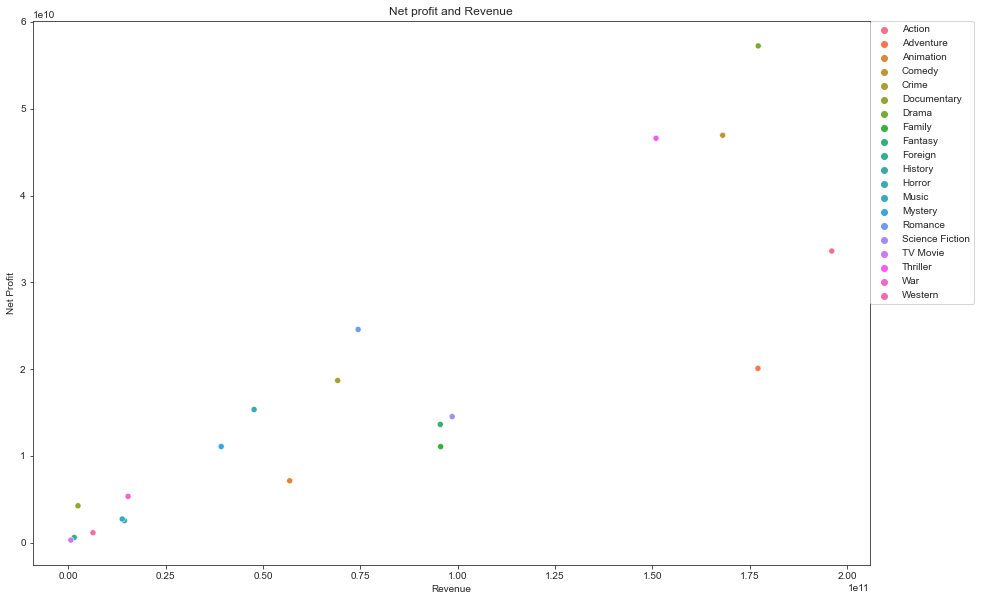

In [41]:
# plot the scatter plot of net profit and revenue
plt.figure(figsize=(15,10))
sns.set_style('ticks')

plt.title('Net profit and Revenue')
plt.xlabel('Revenue')
plt.ylabel('Net Profit')

sns.scatterplot(x="revenue", y="net_profit", hue="genres", data=df6);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.);

We can clearly see positive correlation between budget and revenue here.

Lets redo the same process for budget_adj and revenue_adj so we can compare results accounting for inflation.

In [42]:
df7 = df2[['popularity', 'budget_adj', 'revenue_adj', 'genres']]
budget_revenue_adj = df7.copy()

In [43]:
budget_revenue_adj['net_profit'] = df['revenue_adj'] - df['budget_adj']
budget_revenue_adj

,popularity,budget_adj,revenue_adj,genres,net_profit
0,32.985763,1.379999e+08,1.392446e+09,Action,1.254446e+09
1,32.985763,1.379999e+08,1.392446e+09,Adventure,2.101614e+08
2,32.985763,1.379999e+08,1.392446e+09,Science Fiction,1.704191e+08
3,32.985763,1.379999e+08,1.392446e+09,Thriller,1.718723e+09
4,28.419936,1.379999e+08,3.481613e+08,Action,1.210949e+09
...,...,...,...,...,...
15521,0.141026,4.702610e+06,9.332488e+07,Comedy,NaN
15522,0.141026,4.702610e+06,9.332488e+07,Family,NaN
15523,0.141026,4.702610e+06,9.332488e+07,Mystery,NaN
15524,0.141026,4.702610e+06,9.332488e+07,Romance,NaN


In [44]:
adj_grouped = budget_revenue_adj.groupby('genres').agg(
    {'popularity': 'mean', 'budget_adj': 'sum', 'revenue_adj': 'sum', 'net_profit': 'sum'})
adj_grouped

,popularity,budget_adj,revenue_adj,net_profit
genres,,,,
Action,1.233932,8.370381e+10,2.478173e+11,4.318668e+10
Adventure,1.540154,6.731222e+10,2.221468e+11,2.692153e+10
Animation,1.364771,1.874078e+10,6.503938e+10,9.022251e+09
Comedy,0.826516,7.272202e+10,2.148526e+11,6.351055e+10
Crime,0.936624,3.289810e+10,9.188734e+10,2.508035e+10
Documentary,0.282117,1.922476e+09,2.979475e+09,5.619170e+09
Drama,0.806392,8.608052e+10,2.414858e+11,7.891428e+10
Family,1.193128,3.559110e+10,1.162944e+11,1.538584e+10
Fantasy,1.387571,3.620502e+10,1.112547e+11,1.913955e+10


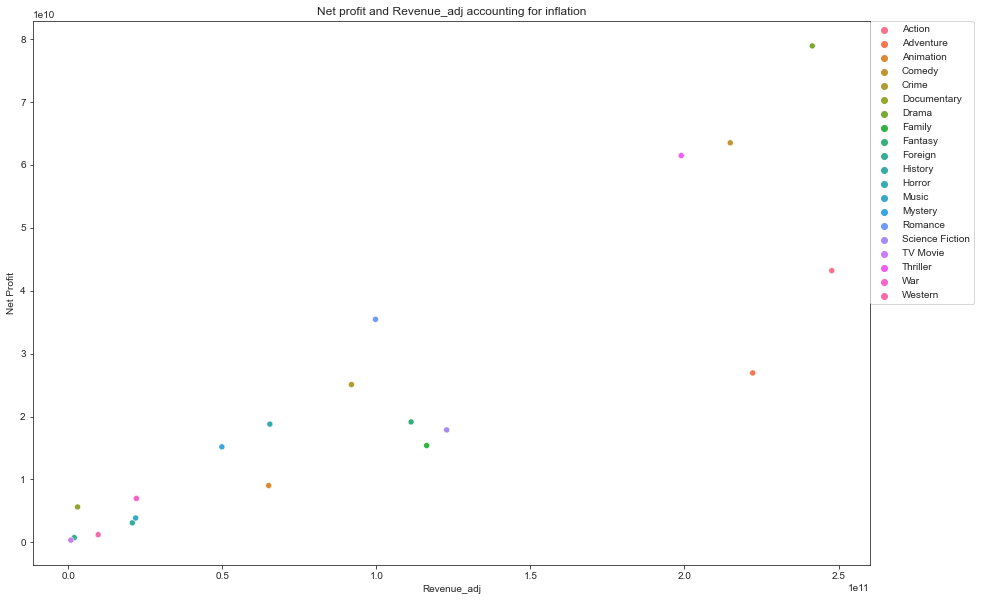

In [45]:
# plot the scatter plot of net profit and revenue
plt.figure(figsize=(15,10))
sns.set_style('ticks')

plt.title('Net profit and Revenue_adj accounting for inflation')
plt.xlabel('Revenue_adj')
plt.ylabel('Net Profit')

sns.scatterplot(x="revenue_adj", y="net_profit", hue="genres", data=adj_grouped);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.);

Our correlation is quite similar when accounting for inflation.

<a id='conclusions'></a>
## Conclusions

For the first question about genres vs popularity we measured up how the stackplot vs the scatterplot would hold up with our 
data. Western was the most popular genre over time according to the stackplot. We could not generate any correlation with the scatterplot.

For our second question we simply needed to explode the column of directors as they were binded by piplines "|". We concluded after analyzing the data that Woody Allen and Steven Spielberg were the winners of movie production. Keep
in mind though that this answer was limited by the amount of data present as we had to trim and wrangle previously.

As for the third question a simple call to the original dataframe to find out when the most movies were released, 13.

Finally, we answered what the correlation between budget vs. revenue looked like by imputing the net profit and plotting that data.



### Limitations

We were severely limited by the fact that most of our data had no budget/revenue values so almost half our original dataset
had to be trimmed to properly analyze our data.

We had to use different dataframes because certain column values were joined by piplines.
